In [2]:
import pynq
import sys
sys.path.append('../qick/qick_lib/')
sys.path.append('../qick-tools/mkids_v2/soft/')
import qick
from qick import *
from mkids import *
import Scan
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
ab = Scan.availableBitfiles()
print(ab)

['mkids_2x2_kidsim_v1', 'mkids_2x2_kidsim_v2']


In [4]:
scan = Scan.Scan(ab[1])

resetting clocks: 245.76 491.52


In [5]:
print(scan.soc)


QICK configuration:

	Board: ZCU216

	Analysis Chains
	0:	 Analysis Chain: ADC Tile = 3, ADC Ch = 0, fs = 614.400 MHz, Number of Channels = 256 
	1:	 Analysis Chain: ADC Tile = 3, ADC Ch = 2, fs = 614.400 MHz, Number of Channels = 256 
	2:	 Analysis Chain: ADC Tile = 2, ADC Ch = 0, fs = 614.400 MHz, Number of Channels = 64 
	3:	 Analysis Chain: ADC Tile = 2, ADC Ch = 2, fs = 614.400 MHz, Number of Channels = 64 

	Synthesis Chains
	0:	 Synthesis Chain: DAC Tile = 3, DAC Ch = 0, fs = 614.400 MHz, Number of Channels = 256 
	1:	 Synthesis Chain: DAC Tile = 3, DAC Ch = 2, fs = 614.400 MHz, Number of Channels = 256 
	2:	 Synthesis Chain: DAC Tile = 2, DAC Ch = 0, fs = 614.400 MHz, Number of Channels = 64 
	3:	 Synthesis Chain: DAC Tile = 2, DAC Ch = 2, fs = 614.400 MHz, Number of Channels = 64 

	Dual Chains
	Dual 0: 
		Analysis : ADC Tile = 2, ADC Ch = 0, fs = 614.400 MHz, Number of Channels = 64
		Synthesis: DAC Tile = 2, DAC Ch = 0, fs = 614.400 MHz, Number of Channels = 64

	Dual 1: 
	

In [6]:
chain = KidsChain(scan.soc, dual=scan.soc['dual'][0])
chain = scan.kidsChain

In [9]:
scan.set_mixer(2700)

2700

In [31]:
#######################
### Frequency Sweep ###
#######################
chain.analysis.qout(8)
chain.synthesis.qout(8)
fc = 2750
df = 90
f,a,phi=chain.sweep(fc-df/2,fc+df/2,N=2000,g=0.95, doPlotFirst=False)

Starting sweep:
  * Start      : 2705.0 MHz
  * End        : 2795.0 MHz
  * Resolution : 0.04502251125541079 MHz
  * Points     : 2000
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194

In [20]:
f_loopback = f
a_loopback = a

In [22]:
f_KPUP_q2 = f
a_KPUP_q2 = a

In [28]:
f_KPUP_q4 = f
a_KPUP_q4 = a

In [30]:
f_KPUP_q6 = f
a_KPUP_q6 = a

In [32]:
f_KPUP_q8 = f
a_KPUP_q8 = a

In [52]:
viridis = cm.get_cmap('viridis', 6)
cmap = viridis(np.linspace(0,1,6))

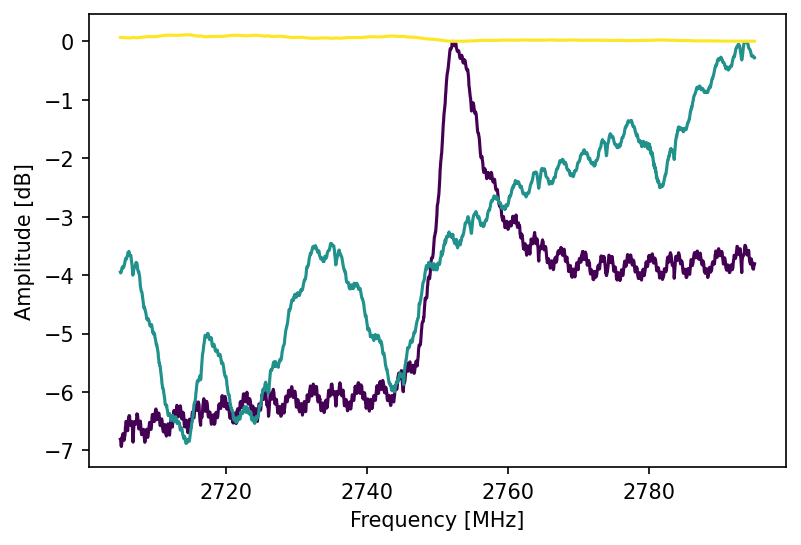

In [51]:
plt.figure(dpi=150)
plt.plot(f_loopback,20*np.log10(a_loopback/max(a_loopback)), color = cmap[0], label = 'loopback')
plt.plot(f_KPUP_q2,20*np.log10(a_KPUP_q2/max(a_KPUP_q2)), color = cmap[2], label = 'KPUP')
plt.plot(f_KPUP_q2,20*np.log10(a_KPUP_q2/max(a_KPUP_q2))/20*np.log10(a_loopback/max(a_loopback)), color = cmap[4], label = 'KPUP/loopback')
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");
# plt.title('g=0.9')

Text(0.5, 0, 'time (s)')

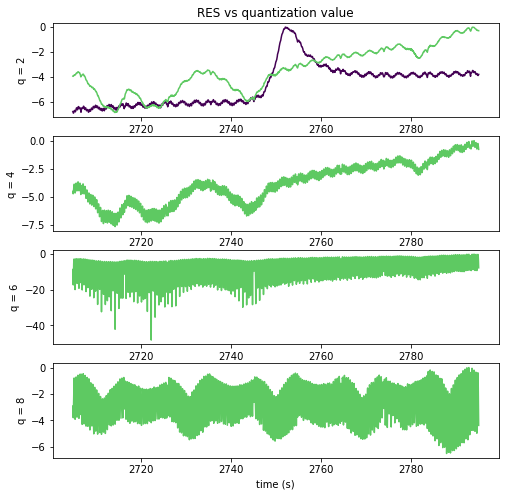

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (8,8))

ax1.plot(f_loopback,20*np.log10(a_loopback/max(a_loopback)), color = cmap[0], label = 'loopback')
ax1.plot(f_KPUP_q2,20*np.log10(a_KPUP_q2/max(a_KPUP_q2)), color = cmap[3], label = 'KPUP')
ax1.set_ylabel('q = 2')
ax1.set_title('RES vs quantization value')

ax2.plot(f_KPUP_q4,20*np.log10(a_KPUP_q4/max(a_KPUP_q4)), color = cmap[3], label = 'KPUP')
ax2.set_ylabel('q = 4')

ax3.plot(f_KPUP_q6,20*np.log10(a_KPUP_q6/max(a_KPUP_q6)), color = cmap[3], label = 'KPUP')
ax3.set_ylabel('q = 6')

ax4.plot(f_KPUP_q8,20*np.log10(a_KPUP_q8/max(a_KPUP_q8)), color = cmap[3], label = 'KPUP')
ax4.set_ylabel('q = 8')
ax4.set_xlabel('time (s)')

Text(0, 0.5, 'divided')

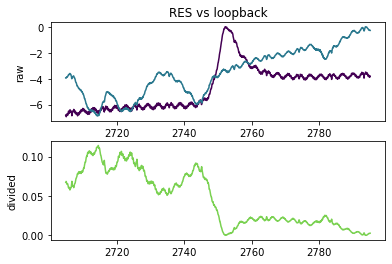

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,4))

ax1.plot(f_loopback,20*np.log10(a_loopback/max(a_loopback)), color = cmap[0], label = 'loopback')
ax1.plot(f_KPUP_q2,20*np.log10(a_KPUP_q2/max(a_KPUP_q2)), color = cmap[2], label = 'KPUP')
ax1.set_ylabel('raw')
ax1.set_title('RES vs loopback')

ax2.plot(f_KPUP_q2,20*np.log10(a_KPUP_q2/max(a_KPUP_q2))/20*np.log10(a_loopback/max(a_loopback)), color = cmap[4], label = 'KPUP/loopback')
ax2.set_ylabel('divided')